In [1]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = (Path(os.getcwd()).resolve().parents[0])/"evals"

### Read the metrics

In [2]:
model_name = 'all-MiniLM-L6-v2'

def read_df(tag):
    df = pd.read_csv(data_dir / (model_name + '_' + tag + '_metrics.csv'))
    df = df[df["metrics"].isin(['recall@10', 'mrr@10'])]
    df = df .melt(
        id_vars = ["metrics"], 
        value_vars = ['384', '192', '96', '48'], 
        var_name = "dim")
    df['dim'] = df['dim'].astype(int)
    df['tag'] = tag
    return df

In [3]:
df = pd.concat(list(map(read_df, ['base', 'finetuned_MNR', 'finetuned_matryoshka']))).reset_index(drop = True)

### Table 1: Compare the performances of the 3 embeddings, without truncation

In [4]:
table_1a = df[(df['metrics'] == 'recall@10') & (df['dim'] == 384)].reset_index(drop = True)
table_1a = table_1a.drop(columns = ['dim', 'metrics'])
table_1a = table_1a.rename(columns = {'value': 'recall@10'})
table_1a = table_1a.set_index('tag')

In [5]:
table_1b = df[(df['metrics'] == 'mrr@10') & (df['dim'] == 384)].reset_index(drop = True)
table_1b = table_1b.drop(columns = ['dim', 'metrics'])
table_1b = table_1b.rename(columns = {'value': 'MRR@10', 'tag': 'model'})
table_1b = table_1b.set_index('model')

In [6]:
table1 = pd.concat([table_1a, table_1b], axis = 1)
table1

,recall@10,MRR@10
base,0.575849,0.320326
finetuned_MNR,0.663086,0.369517
finetuned_matryoshka,0.659648,0.358966


### Figure 1: Compare the performances of the 3 embeddings with truncation¶

In [7]:
table_2a = df[(df['metrics'] == "recall@10")]
table_2a = table_2a.drop(columns = ['metrics'])
table_2a = table_2a.rename(columns = {'value': 'recall@10'})
table_2a = table_2a.rename(columns = {'tag': 'model'})
table_2a.pivot(index = "model", columns = "dim")

recall@10                              
dim                        48        96        192       384
model                                                       
base                  0.327460  0.465836  0.535024  0.575849
finetuned_MNR         0.587452  0.629996  0.654061  0.663086
finetuned_matryoshka  0.631715  0.639880  0.648904  0.659648

In [8]:
table_2b = df[(df['metrics'] == "mrr@10")]
table_2b = table_2b.drop(columns = ['metrics'])
table_2b = table_2b.rename(columns = {'value': 'mrr@10'})
table_2b = table_2b.rename(columns = {'tag': 'model'})
table_2b.pivot(index = "model", columns = "dim")

mrr@10                              
dim                        48        96        192       384
model                                                       
base                  0.167329  0.245106  0.293383  0.320326
finetuned_MNR         0.319778  0.347936  0.363938  0.369517
finetuned_matryoshka  0.344141  0.351258  0.354373  0.358966

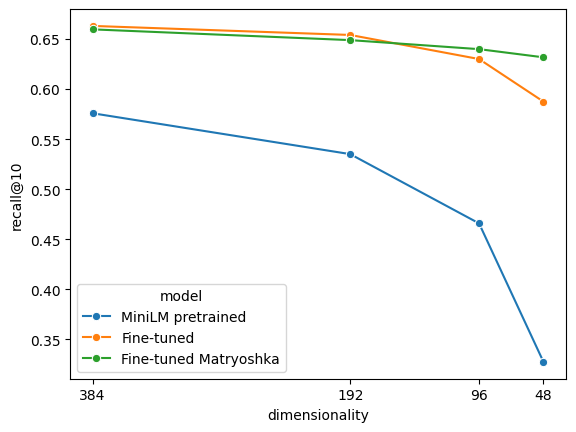

In [14]:
table_2a_ = table_2a.copy()
table_2a_['dim'] = 384 - table_2a_['dim'] 
table_2a_['model'] = table_2a_['model'].map({'base': 'MiniLM pretrained', 
                                             'finetuned_MNR': 'Fine-tuned', 
                                             'finetuned_matryoshka': 'Fine-tuned Matryoshka'})

ax = sns.lineplot(x = "dim", y = "recall@10", hue = "model", data = table_2a_, marker = "o")
ax.set(xlabel='dimensionality')
ax.set_xticks([0, 192, 288, 336])
ax.set_xticklabels([384, 192, 96, 48])
ax.get_figure().savefig('fig1.png')

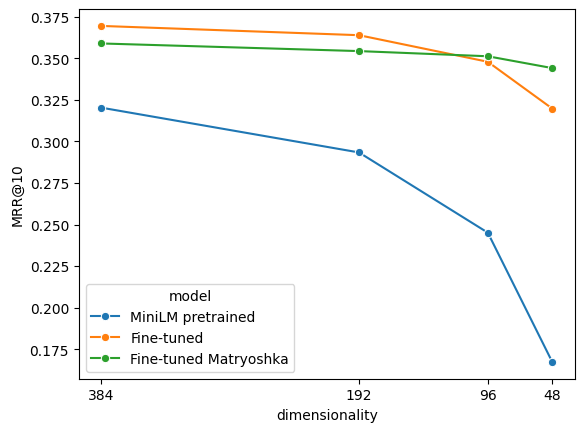

In [15]:
table_2b_ = table_2b.copy()
table_2b_['dim'] = 384 - table_2b_['dim'] 
table_2b_['model'] = table_2b_['model'].map({'base': 'MiniLM pretrained', 
                                             'finetuned_MNR': 'Fine-tuned', 
                                             'finetuned_matryoshka': 'Fine-tuned Matryoshka'})

ax = sns.lineplot(x = "dim", y = "mrr@10", hue = "model", data = table_2b_, marker = "o")
ax.set(xlabel='dimensionality')
ax.set(ylabel='MRR@10')
ax.set_xticks([0, 192, 288, 336])
ax.set_xticklabels([384, 192, 96, 48])
ax.get_figure().savefig('fig2.png')